# Appendix
### Finance and the Unexpected
Saranya Anantapantula &
Jessica Wachter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew, kurtosis, norm 
import random
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## Return Distribution for a Single Stock (Figure 3)

This figure simulates daily returns for a single stock using a jump-diffusion process with these parameters:
- Mean = 0.04
- Volatility = 0.0324
- Jump intensity = 0.33
- Jump mean = 0.12
- Jump volatility = 0.0064

The histogram below shows the simulated density of gross returns.

In [2]:
# set seed to 3 for reproducibility 
np.random.seed(3)

# parameters
N = 500_000
mu = 0.04
sigma = 0.0324
omega = 0.33
theta = 0.12
delta = 0.0064

# jump diffusion model
def single_stock_returns (N, mu, sigma, omega, theta, delta):
    # w_t: the continuous part, smooth day-to-day prices
    w = np.random.normal(loc=mu, scale=sigma, size=N)

    # z: the jumps, or the suddent spikes/crashes
    # the number of jumps
    p_fail = 1 - omega 
    j = np.random.geometric(p=p_fail, size=N) - 1 #subtract one to get the number of jumps it was successful

    # scale of the jumps
    z_t = np.random.normal(loc = theta, scale = delta, size = N )
    z = j * z_t
    
    # convert log normal returns into 1D arry of daily gross returns
    return np.exp(w+z)

returns = single_stock_returns (N, mu, sigma, omega, theta, delta)

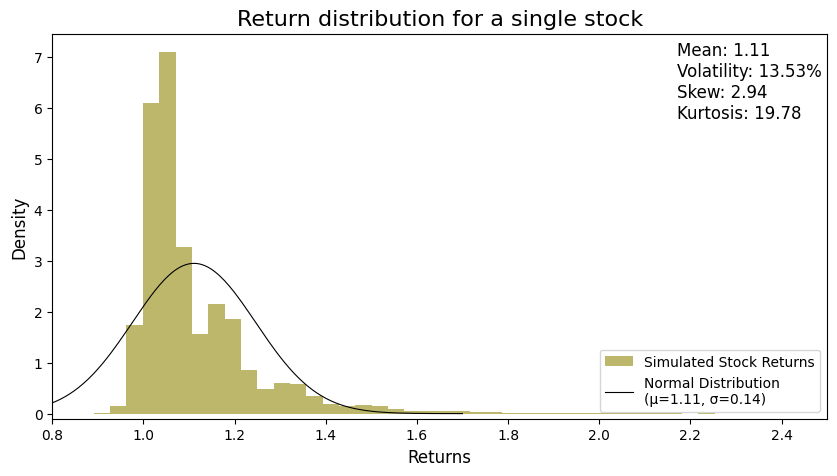

In [3]:
# calculate stats
mean = returns.mean()
vol = returns.std()
skewness = skew(returns)
kurt = kurtosis(returns, fisher=False)

# plot histogram of daily returns 
plt.figure(figsize=(10, 5))
plt.hist(returns, bins=100, color='darkkhaki', density=True, label = "Simulated Stock Returns")

# plot normal distribution pdf with same mean and standard deviation
x = np.linspace(min(returns) - 0.2, 1.7, 200)
pdf_values = stats.norm.pdf(x, mean, vol)
plt.plot(x,pdf_values, 'k-', linewidth = 0.8,
         label=f'Normal Distribution\n(μ={mean:.2f}, σ={vol:.2f})')

# styling 
plt.title("Return distribution for a single stock", fontsize=16)
plt.xlabel("Returns", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.legend()

stats_text = (
    f"Mean: {mean:.2f}\n"
    f"Volatility: {vol * 100:.2f}%\n" 
    f"Skew: {skewness:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)

plt.text(2.17, 5.8, stats_text, fontsize=12)
plt.xlim(0.8, 2.5)
plt.ylim(-0.1,)
plt.savefig("./figures/fig_03.png", dpi=300, bbox_inches="tight")
plt.show()


## Return Distribution for a Single Small-Cap Stock (Figure 4)

This figure uses WRDS data for a small-cap, pharmaceutical stock (Sarepta Therapeutics) to plot its return distribution.

Query Details:
- CRSP > Monthly Update > Legacy Data - Stock/Security Files > Daily Stock File
- All possible dates
- Ticker: SRPT 

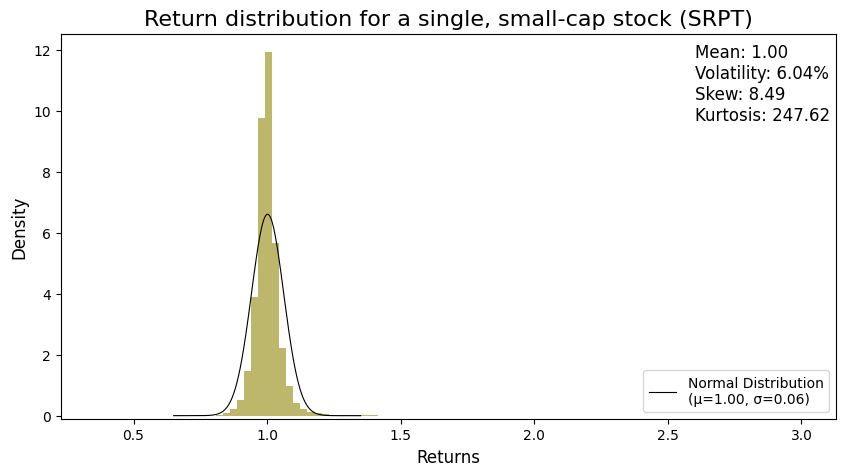

In [4]:
df = pd.read_csv("./data/fig4_SRPT.csv")

# convert returns to a numeric column
df["RET"] = pd.to_numeric(df["RET"], errors="coerce")
df = df.dropna(subset = "RET")

# calculate gross returns
df["GRET"] = df["RET"] + 1
g_returns = df["GRET"]

# calculate stats
mean = np.mean(g_returns)
vol = np.std(g_returns)
skewness = skew(g_returns)
kurt = kurtosis(g_returns, fisher=False) 

# plot histogram of daily returns 
plt.figure(figsize=(10, 5))
plt.hist(g_returns, bins=100, color="darkkhaki", density=True)

# normal distribution pdf
x = np.linspace(0.65, 1.35, 10_000)
pdf_values = stats.norm.pdf(x, mean, vol)
plt.plot(x,pdf_values, 'k-', linewidth = 0.8,
         label=f'Normal Distribution\n(μ={mean:.2f}, σ={vol:.2f})')

# styling
plt.title("Return distribution for a single, small-cap stock (SRPT)", fontsize=16)
plt.xlabel("Returns", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.legend(loc = "lower right")

stats_text = (
    f"Mean: {mean:.2f}\n"
    f"Volatility: {vol*100:.2f}%\n"
    f"Skew: {skewness:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)
plt.text(2.6, 9.7, stats_text, fontsize=12)
plt.ylim(-0.1, )
plt.savefig("./figures/fig_04.png", dpi=300, bbox_inches="tight")
plt.show()

In [5]:
print(min(g_returns))
print(max(g_returns))

0.35990200000000006
2.997332


## Return Distribution for a Single Large Stock (Figure 5)

This figure uses WRDS data for Apple Inc. to show the distribution of daily gross returns.

Query Details:
- CRSP > Monthly Update > Legacy Data - Stock/Security Files > Daily Stock File
- All possible dates
- Ticker: AAPL 

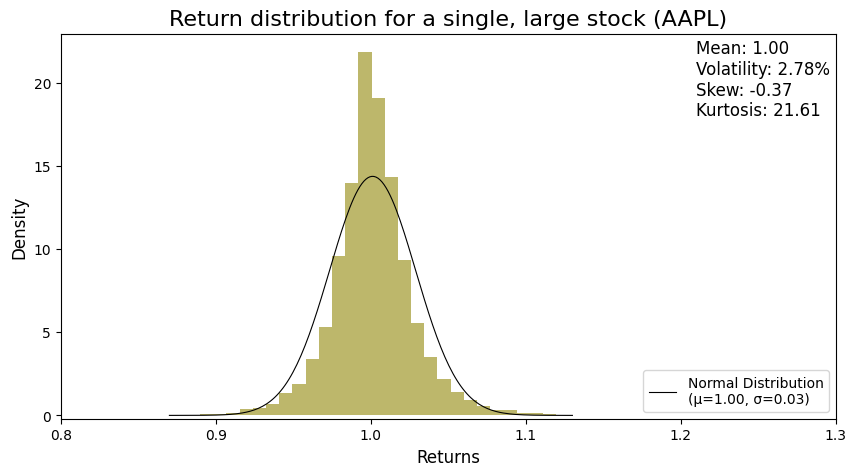

In [6]:
df = pd.read_csv("./data/fig5_AAPL.csv")

# convert returns to a numeric column
df["RET"] = pd.to_numeric(df["RET"], errors="coerce")
df = df.dropna(subset = "RET")

# calculate gross returns
df["GRET"] = df["RET"] + 1
g_returns = df["GRET"]

# calculate stats
mean = np.mean(g_returns)
vol = np.std(g_returns)
skewness = skew(g_returns)
kurt = kurtosis(g_returns, fisher=False)

# plot histogram of daily returns
plt.figure(figsize=(10, 5))
plt.hist(g_returns, bins=100, color="darkkhaki", density=True)

# normal distribution pdf
x = np.linspace(0.87, 1.13, 200)
pdf_values = stats.norm.pdf(x, mean, vol)
plt.plot(x,pdf_values, 'k-', linewidth = 0.8,
        label=f'Normal Distribution\n(μ={mean:.2f}, σ={vol:.2f})')

# styling
plt.title("Return distribution for a single, large stock (AAPL)", fontsize=16)
plt.xlabel("Returns", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.legend(loc = "lower right")

stats_text = (
    f"Mean: {mean:.2f}\n"
    f"Volatility: {vol*100:.2f}%\n"
    f"Skew: {skewness:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)

plt.text(1.21, 18, stats_text, fontsize=12)
plt.xlim(0.8,1.3)
plt.ylim(-0.2,)
plt.savefig("./figures/fig_05.png", dpi=300, bbox_inches="tight")
plt.show()

In [7]:
print(min(g_returns))
print(max(g_returns))

0.48130799999999996
1.332278


## Return Distribution for a Portfolio of 100 Stocks (Figure 6)

This figure simulates a portfolio by averaging returns from 100 independent stocks (i.i.d. draws from the same distribution).

In [8]:
copies = 100

# 100 copies from the Figure 3 single stock simulation
returns_matrix = np.vstack([single_stock_returns(N, mu, sigma, omega, theta, delta) for _ in range(copies)]) # matrix of (m,N), so (100, 500K)

# each day, portfolio_returns represent the average return of the 100 constituent stocks
portfolio_returns = returns_matrix.mean(axis=0)

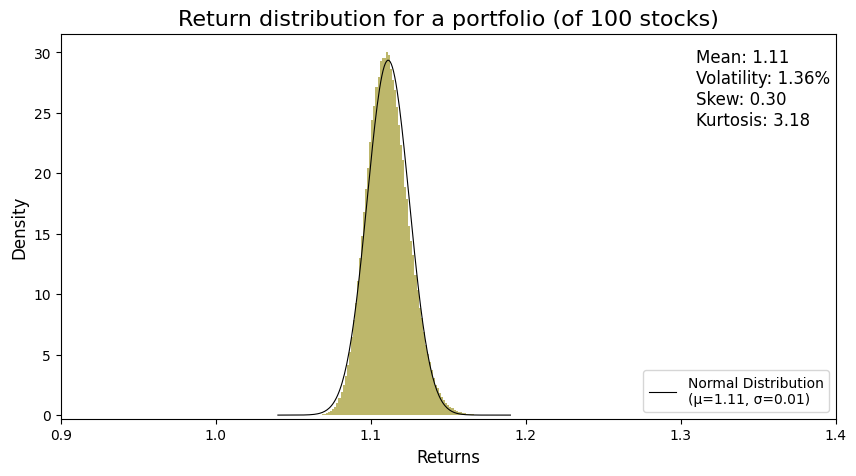

In [9]:
# calculate stats
mean = portfolio_returns.mean()
vol = portfolio_returns.std()
skewness = skew(portfolio_returns)
kurt = kurtosis(portfolio_returns, fisher=False)

# plot histogram of daily returns 
plt.figure(figsize=(10, 5))
plt.hist(portfolio_returns, bins=100, color='darkkhaki', density=True)

# normal distribution pdf
x = np.linspace(1.04, 1.19, 200)
pdf_values = stats.norm.pdf(x, mean, vol)
plt.plot(x,pdf_values, 'k-', linewidth = 0.8,
        label=f'Normal Distribution\n(μ={mean:.2f}, σ={vol:.2f})')

# styling
plt.title("Return distribution for a portfolio (of 100 stocks)", fontsize=16)
plt.xlabel("Returns", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.legend(loc = "lower right")

stats_text = (
    f"Mean: {mean:.2f}\n"
    f"Volatility: {vol * 100:.2f}%\n" 
    f"Skew: {skewness:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)
plt.text(1.31, 24, stats_text, fontsize=12)
plt.xlim(0.9, 1.4)
plt.ylim(-0.3,)
plt.savefig("./figures/fig_06.png", dpi=300, bbox_inches="tight")
plt.show()


In [10]:
print(
    max(portfolio_returns))
print(min(portfolio_returns))


1.19044805608269
1.057850204861473


## Daily Returns on the Market Portfolio (Figure 8)

This figure uses CRSP index data to plot the distribution of daily returns for the market portfolio. 

Query Details: 
- CRSP > Annual Update > Index - Version 2 (CIZ) > CRSP Daily Stock File Indexes
- Dates: 1988-06-01 to 2022-12-31
- Index Code: 1000080

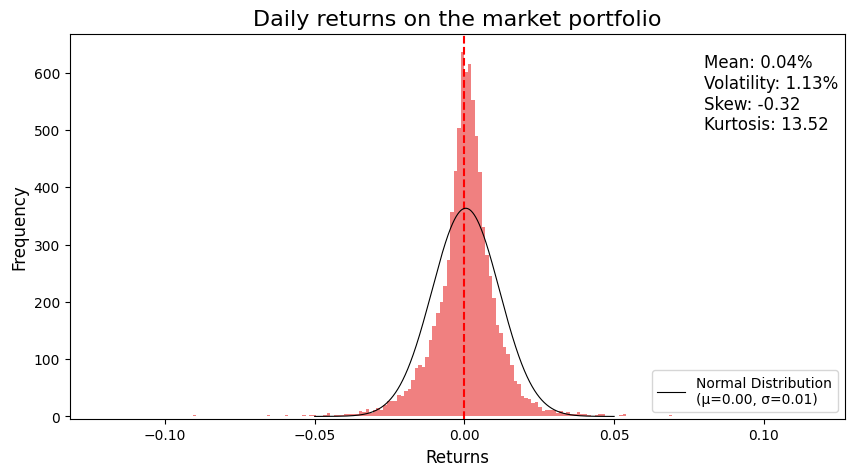

In [11]:
df = pd.read_csv("./data/fig8_MarketReturns.csv")

# convert returns to a numeric column
df["COL1"] = pd.to_numeric(df["COL1"], errors = "coerce")
df = df.dropna(subset = "COL1")
df["returns"] = df["COL1"]
returns = df["returns"]

# calculate stats
mean = np.mean(returns)
vol = np.std(returns)
skw = skew(returns)
kurt = kurtosis(returns, fisher=False)

# plot histogram of daily returns 
plt.figure(figsize=(10, 5))
counts, bins, _ = plt.hist(returns, bins=200, color='lightcoral', density=False)
plt.axvline(x=0, color='red', linestyle='dashed')

# normal distribution pdf
x = np.linspace(-0.05, 0.05, 9000)
pdf = stats.norm.pdf(x, mean, vol)
# scale the normal pdf to match total area of histogram
bin_width = bins[1] - bins[0]
pdf_values = pdf * len(returns) * bin_width
plt.plot(x,pdf_values, 'k-', linewidth = 0.8,
        label=f'Normal Distribution\n(μ={mean:.2f}, σ={vol:.2f})')

# styling
plt.title("Daily returns on the market portfolio", fontsize=16)
plt.xlabel("Returns", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.legend(loc = "lower right")

stats_text = (
    f"Mean: {mean*100:.2f}%\n"
    f"Volatility: {vol*100:.2f}%\n"
    f"Skew: {skw:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)

plt.text(0.08, 500, stats_text, fontsize=12)
plt.ylim(-4,)
plt.savefig("./figures/fig_08.png", dpi=300, bbox_inches="tight")
plt.show()


## Sampling Distribution for Kurtosis (Figure 9)

This figure is the distribution of kurtosis from a Monte Carlo simulation:
- Generate a population of market-like returns using these parameters:
    - Mean = 0.023
    - Volatility = 0.01
    - Jump intensity = 0.01
    - Jump mean = -0.3
    - Jump volatility = 0.15

- Draw repeated samples of size 50 without replacement.
- Compute kurtosis for each sample.

In [12]:
# fix seed for reproducibility 
np.random.seed(3)

# parameters
N = 500_000
mu = 0.023
sigma = 0.01
omega= 0.01
theta = -0.3
delta = 0.15

# calculate market returns 
market_returns = single_stock_returns(N, mu, sigma, omega, theta, delta)
# find the the population kurtosis for these returns
pop_kurt = kurtosis(market_returns, fisher=False) 

# Monte carlo sampling
iter = 10_000
sample_size = 50

sample_kurt = np.empty(iter) # empty list for each sample's kurtosis

# for each iteration, pick 50 distinct market returns (w/o replacement so each of the 50 market returns is distinct)
for i in range(iter):
    sample = np.random.choice(market_returns, size=sample_size, replace=False)
    sample_kurt[i] = kurtosis(sample, fisher=False)

# find the mean kurtosis of the samples
mean_sample_kurt = sample_kurt.mean()

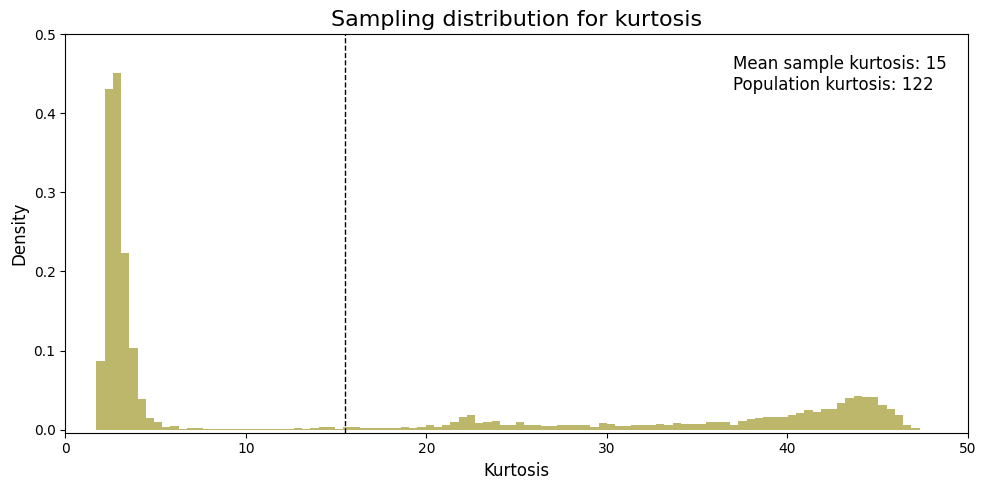

In [13]:
# plot
plt.figure(figsize=(10, 5))
plt.hist(sample_kurt, bins=100, color="darkkhaki", density=True)
plt.axvline(mean_sample_kurt, color='black', linestyle='dashed', linewidth=1)

# styling
plt.title("Sampling distribution for kurtosis", fontsize=16)
plt.xlabel("Kurtosis", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

stats_text = (
    f"Mean sample kurtosis: {mean_sample_kurt:.0f}\n"
    f"Population kurtosis: {pop_kurt:.0f}"
)

plt.text(37, 0.43, stats_text, fontsize=12)
plt.xlim(0, 50)
plt.ylim(-0.004,0.5)
plt.tight_layout()
plt.savefig("./figures/fig_09.png", dpi=300, bbox_inches="tight")
plt.show()

## Distribution of Returns: Put-Write Index vs Market Portfolio (Figure 13)

This figure compares market portfolio daily returns (data from Figure 8) to CBOE PutWrite index daily returns (data from CBOE). 

In [14]:
# load both datasets
market = pd.read_csv("./data/fig8_MarketReturns.csv")
cboe = pd.read_csv("./data/fig13_PutWriteReturns.csv")

# ensure data is in the same timeframe (from 2007/01/03 to 2022/12/31)
market["DlyCalDt"] = pd.to_datetime(market["DlyCalDt"], format="%Y%m%d")
start_date = datetime(2007, 1, 3)
market = market[market["DlyCalDt"] >= start_date]

cboe["DATE"] = pd.to_datetime(cboe["DATE"])
end_date = datetime(2022, 12, 31)
cboe = cboe[cboe["DATE"] <= end_date]

# convert returns into numeric columns
market["COL1"] = pd.to_numeric(market["COL1"], errors = "coerce")
market = market.dropna(subset = "COL1")
market_returns = market["COL1"]

cboe["return"] = pd.to_numeric(cboe["return"], errors = "coerce")
cboe = cboe.dropna(subset = "return")
putwrite_returns = cboe["return"]

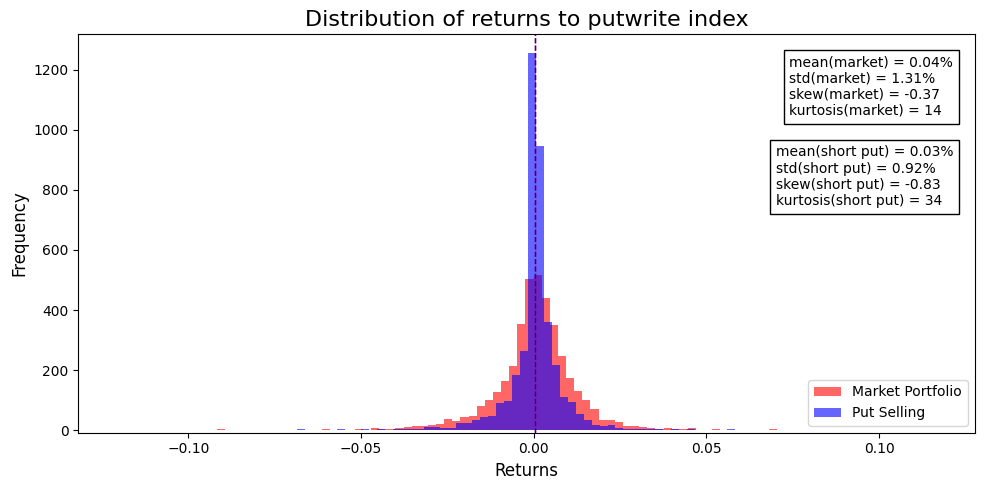

In [15]:
#plot! 
plt.figure(figsize=(10, 5))
plt.hist(market_returns, bins=100, alpha=0.6, color='red', label="Market Portfolio")
plt.hist(putwrite_returns, bins=100, alpha=0.6, color='blue', label="Put Selling")
plt.axvline(market_returns.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(putwrite_returns.mean(), color='blue', linestyle='dashed', linewidth=1)

plt.title("Distribution of returns to putwrite index", fontsize = 16)
plt.xlabel("Returns", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.legend(loc = "lower right")

market_stats = (
    f"mean(market) = {np.mean(market_returns)*100:.2f}%\n"
    f"std(market) = {np.std(market_returns)*100:.2f}%\n"
    f"skew(market) = {skew(market_returns):.2f}\n"
    f"kurtosis(market) = {kurtosis(market_returns, fisher=False):.0f}"
)

put_stats = (
    f"mean(short put) = {np.mean(putwrite_returns)*100:.2f}%\n"
    f"std(short put) = {np.std(putwrite_returns)*100:.2f}%\n"
    f"skew(short put) = {skew(putwrite_returns):.2f}\n"
    f"kurtosis(short put) = {kurtosis(putwrite_returns, fisher=False):.0f}"
)

plt.text(0.074, 1050, market_stats, fontsize=10, bbox=dict(facecolor="white", edgecolor="black"))
plt.text(0.07, 750, put_stats, fontsize=10, bbox=dict(facecolor="white", edgecolor="black"))
plt.ylim(-9,)
plt.tight_layout()  
plt.savefig("./figures/fig_13.png", dpi=300, bbox_inches="tight")
plt.show()

## Outlier Returns: Put-Write Index vs Market Portfolio (Figure 14)

This figure focuses on the outliers of the previous comparison:
- Filters days where |return| > 3%.

In [16]:
# outlier threshold = 0.03 
threshold = 0.03
market_mask = np.abs(market_returns) > threshold
putwrite_mask = np.abs(putwrite_returns) > threshold

market_outliers = market_returns[market_mask]
putwrite_outliers = putwrite_returns[putwrite_mask]

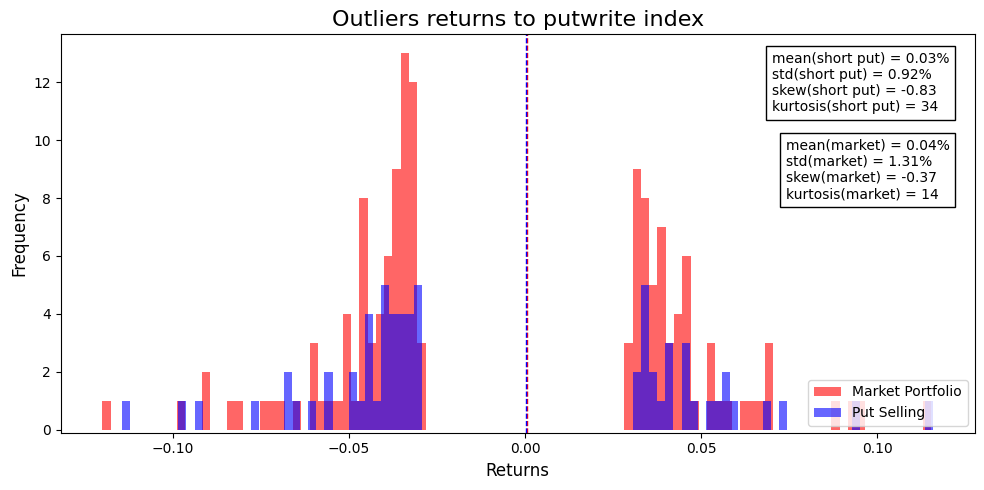

In [17]:
#plot! 
plt.figure(figsize=(10, 5))
plt.hist(market_outliers, bins=100, alpha=0.6, color='red', label="Market Portfolio")
plt.hist(putwrite_outliers, bins=100, alpha=0.6, color='blue', label="Put Selling")
plt.axvline(market_returns.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(putwrite_returns.mean(), color='blue', linestyle='dashed', linewidth=1)

plt.title("Outliers returns to putwrite index", fontsize = 16)
plt.xlabel("Returns", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.legend(loc = "lower right")

market_stats = (
    f"mean(market) = {np.mean(market_returns)*100:.2f}%\n"
    f"std(market) = {np.std(market_returns)*100:.2f}%\n"
    f"skew(market) = {skew(market_returns):.2f}\n"
    f"kurtosis(market) = {kurtosis(market_returns, fisher=False):.0f}"
)

put_stats = (
    f"mean(short put) = {np.mean(putwrite_returns)*100:.2f}%\n"
    f"std(short put) = {np.std(putwrite_returns)*100:.2f}%\n"
    f"skew(short put) = {skew(putwrite_returns):.2f}\n"
    f"kurtosis(short put) = {kurtosis(putwrite_returns, fisher=False):.0f}"
)

plt.text(0.074, 8, market_stats, fontsize=10, bbox=dict(facecolor="white", edgecolor="black"))
plt.text(0.07, 11, put_stats, fontsize=10, bbox=dict(facecolor="white", edgecolor="black"))
plt.ylim(-0.1,)
plt.tight_layout()
plt.savefig("./figures/fig_14.png", dpi=300, bbox_inches="tight")
plt.show()

